# Introduction to pandas, visualizing Titanic

## Master 2 TSE

#### Raphaël Sourty

In [1]:
import numpy as np
import pandas as pd

#### You can download the data here: https://www.kaggle.com/c/titanic/data

In [2]:
df = pd.read_csv(r'C:\Users\lea31\OneDrive\Documents\KAGGLE\titanic/train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


| Variable 	| Definition                                 	| Key                                            	|
|----------	|--------------------------------------------	|------------------------------------------------	|
| survival 	| Survival                                   	| 0 = No, 1 = Yes                                	|
| pclass   	| Ticket class                               	| 1 = 1st, 2 = 2nd, 3 = 3rd                      	|
| sex      	| Sex                                        	|                                                	|
| Age      	| Age in years                               	|                                                	|
| sibsp    	| # of siblings / spouses aboard the Titanic 	|                                                	|
| parch    	| # of parents / children aboard the Titanic 	|                                                	|
| ticket   	| Ticket number                              	|                                                	|
| fare     	| Passenger fare                             	|                                                	|
| cabin    	| Cabin number                               	|                                                	|
| embarked 	| Port of Embarkation                        	| C = Cherbourg, Q = Queenstown, S = Southampton 	|

In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Who are the survivors of the Titanic?

#### Survival rate

In [5]:
df.groupby('Survived')['PassengerId'].agg(['count'])

,count
Survived,
0,549
1,342


<AxesSubplot:xlabel='Survived'>

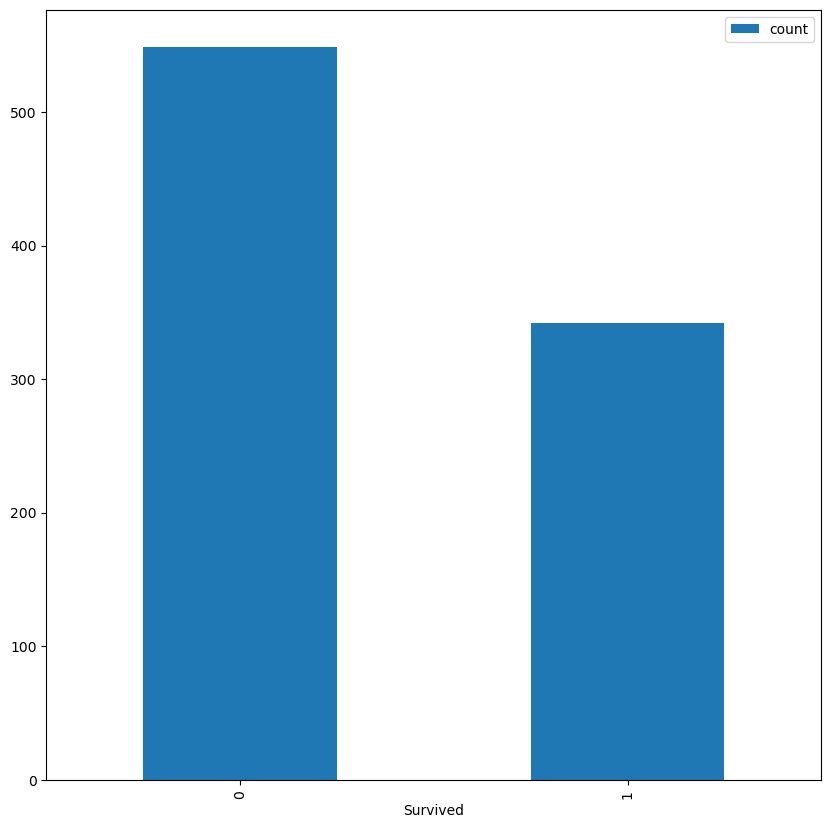

In [6]:
df.groupby('Survived')['PassengerId'].agg(
    ['count']
).reset_index().plot(x='Survived', y='count', kind = 'bar', figsize = (10, 10))

#### Survival rate depending on genre

In [7]:
df.groupby(
    ['Survived', 'Sex']
)['PassengerId'].agg(['count'])

count
Survived Sex          
0        female     81
         male      468
1        female    233
         male      109

In [8]:
df.groupby(
    ['Survived', 'Sex']
)['PassengerId'].agg(['count']).unstack()

count     
Sex      female male
Survived            
0            81  468
1           233  109

<AxesSubplot:xlabel='Survived'>

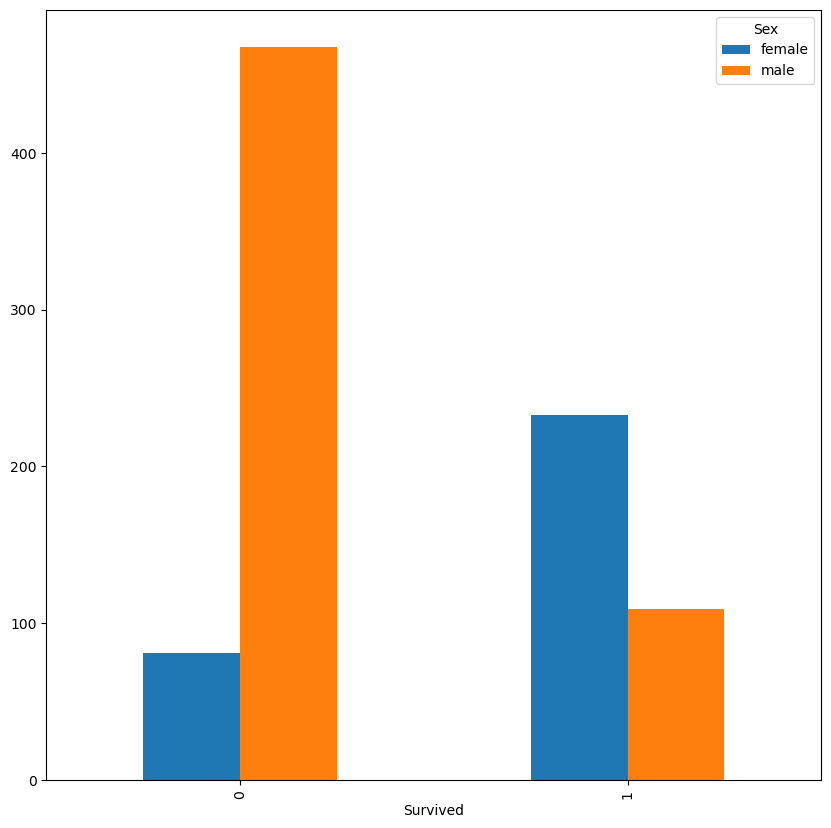

In [9]:
df.groupby(
    ['Survived', 'Sex']
)['PassengerId'].count().unstack().plot(kind ='bar', figsize = (10, 10))

#### Survival rate depending on Ticket class

In [10]:
df.groupby(['Survived', 'Pclass'])['PassengerId'].agg(
    ['count']
)

count
Survived Pclass       
0        1          80
         2          97
         3         372
1        1         136
         2          87
         3         119

In [11]:
df.groupby(['Survived', 'Pclass'])['PassengerId'].count().unstack()

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


<AxesSubplot:xlabel='Survived'>

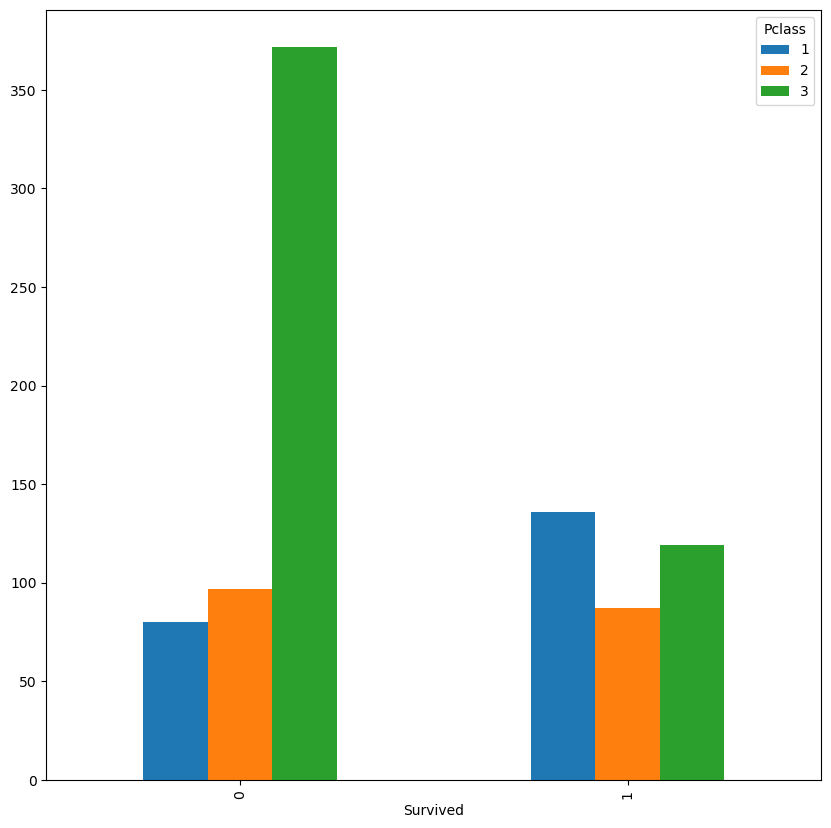

In [12]:
df.groupby(
    ['Survived', 'Pclass']
)['PassengerId'].count().unstack().plot(kind ='bar', figsize = (10, 10))

#### Survival rate depending on Age

In [4]:
df['generation'] = pd.cut(df['Age'], 8)

In [19]:
# [(0.34, 10.368] 
# (10.368, 20.315] 
# (20.315, 30.263] 
# (30.263, 40.21] 
# (40.21, 50.158] 
# (50.158, 60.105] 
# (60.105, 70.052] 
# (70.052, 80.0]]

pd.cut(df['Age'], 8)

0      (20.315, 30.263]
1       (30.263, 40.21]
2      (20.315, 30.263]
3       (30.263, 40.21]
4       (30.263, 40.21]
             ...       
886    (20.315, 30.263]
887    (10.368, 20.315]
888                 NaN
889    (20.315, 30.263]
890     (30.263, 40.21]
Name: Age, Length: 891, dtype: category
Categories (8, interval[float64, right]): [(0.34, 10.368] < (10.368, 20.315] < (20.315, 30.263] < (30.263, 40.21] < (40.21, 50.158] < (50.158, 60.105] < (60.105, 70.052] < (70.052, 80.0]]

In [20]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,fare_category,generation
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,"(-0.512, 42.694]","(20.315, 30.263]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,"(42.694, 85.388]","(30.263, 40.21]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"(-0.512, 42.694]","(20.315, 30.263]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,"(42.694, 85.388]","(30.263, 40.21]"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,"(-0.512, 42.694]","(30.263, 40.21]"


<AxesSubplot:xlabel='Survived'>

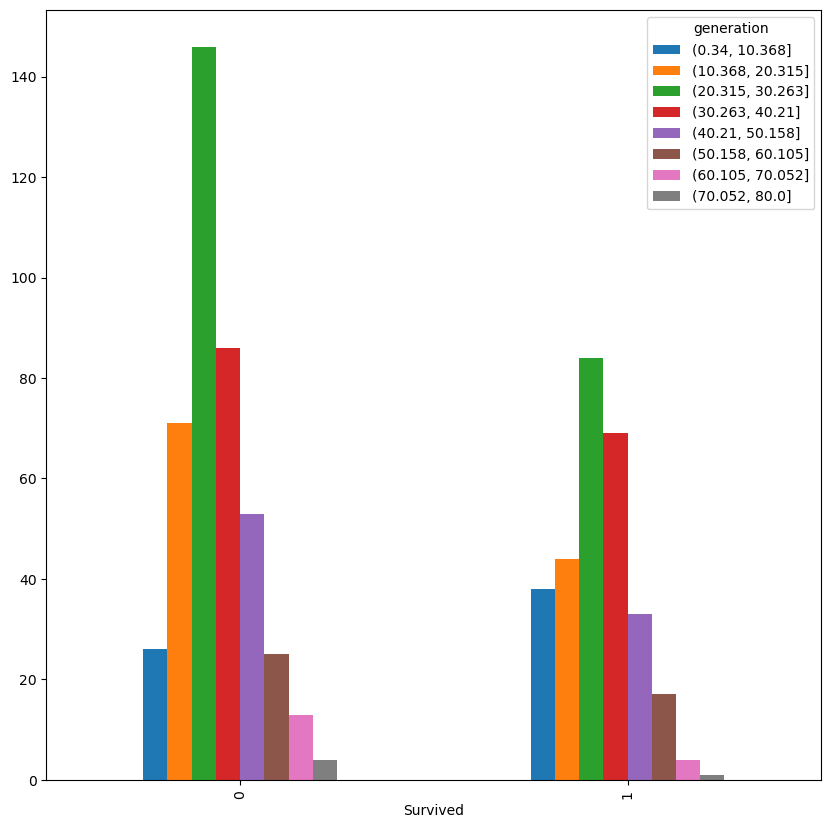

In [21]:
df.groupby(
    ['Survived', 'generation']
)['PassengerId'].count().unstack().plot(kind ='bar', figsize = (10, 10))

#### Survival rate depending on Fare

In [5]:
df['fare_category'] = pd.cut(df['Fare'], 12)

In [23]:
pd.cut(df['Fare'], 10)

0       (-0.512, 51.233]
1      (51.233, 102.466]
2       (-0.512, 51.233]
3      (51.233, 102.466]
4       (-0.512, 51.233]
             ...        
886     (-0.512, 51.233]
887     (-0.512, 51.233]
888     (-0.512, 51.233]
889     (-0.512, 51.233]
890     (-0.512, 51.233]
Name: Fare, Length: 891, dtype: category
Categories (10, interval[float64, right]): [(-0.512, 51.233] < (51.233, 102.466] < (102.466, 153.699] < (153.699, 204.932] ... (307.398, 358.63] < (358.63, 409.863] < (409.863, 461.096] < (461.096, 512.329]]

<AxesSubplot:xlabel='Survived'>

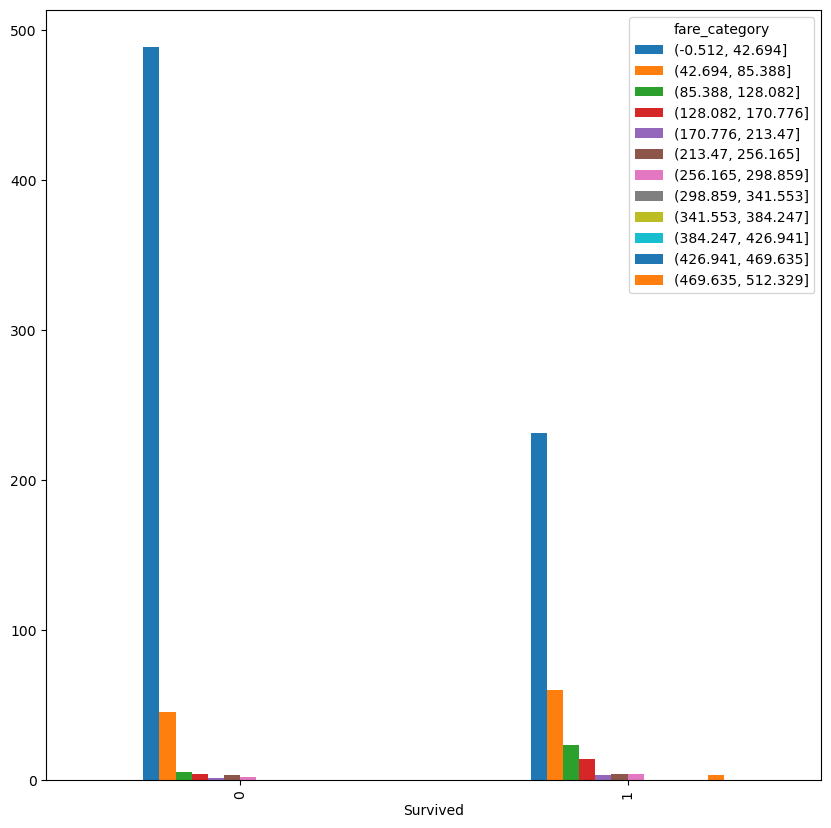

In [24]:
df.groupby(
    ['Survived', 'fare_category']
)['PassengerId'].count().unstack().plot(kind ='bar', figsize = (10, 10))

#### What about correlations?

In [25]:
df[['Survived', 'Pclass', 'Age', 'Fare', 'SibSp', 'Parch']].corr()

,Survived,Pclass,Age,Fare,SibSp,Parch
Survived,1.000000,-0.338481,-0.077221,0.257307,-0.035322,0.081629
Pclass,-0.338481,1.000000,-0.369226,-0.549500,0.083081,0.018443
Age,-0.077221,-0.369226,1.000000,0.096067,-0.308247,-0.189119
Fare,0.257307,-0.549500,0.096067,1.000000,0.159651,0.216225
SibSp,-0.035322,0.083081,-0.308247,0.159651,1.000000,0.414838
Parch,0.081629,0.018443,-0.189119,0.216225,0.414838,1.000000


In [26]:
df[['Survived', 'Pclass', 'Age', 'Fare', 'SibSp', 'Parch']].corr().style.background_gradient(cmap='coolwarm')

,Survived,Pclass,Age,Fare,SibSp,Parch
Survived,1.000000,-0.338481,-0.077221,0.257307,-0.035322,0.081629
Pclass,-0.338481,1.000000,-0.369226,-0.549500,0.083081,0.018443
Age,-0.077221,-0.369226,1.000000,0.096067,-0.308247,-0.189119
Fare,0.257307,-0.549500,0.096067,1.000000,0.159651,0.216225
SibSp,-0.035322,0.083081,-0.308247,0.159651,1.000000,0.414838
Parch,0.081629,0.018443,-0.189119,0.216225,0.414838,1.000000


## Questions:

##### Cabins on the port side have an even number and cabins on the starboard side have an odd number. 

#### For example, cabin B57 is located on the starboard side.

#### Which side of the boat is better to be on? 


#### The deck number of the boat is indicated on the ticket. Cabin B57 is located on deck B. Which deck is best to be on?

#### Where is the best place to be on the boat in general?

#### Is there a link between the number of parents/family on the boat and chances of survival?

In [6]:
df_nbCabin = df.loc[df['Cabin'].notnull(), :]
df_nbCabin.reset_index(drop = True, inplace = True)
print(len(df_nbCabin))
df_nbCabin

204


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,generation,fare_category
0,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,"(30.263, 40.21]","(42.694, 85.388]"
1,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,"(30.263, 40.21]","(42.694, 85.388]"
2,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,"(50.158, 60.105]","(42.694, 85.388]"
3,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,"(0.34, 10.368]","(-0.512, 42.694]"
4,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,"(50.158, 60.105]","(-0.512, 42.694]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S,"(40.21, 50.158]","(42.694, 85.388]"
200,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S,"(30.263, 40.21]","(-0.512, 42.694]"
201,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C,"(50.158, 60.105]","(42.694, 85.388]"
202,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,"(10.368, 20.315]","(-0.512, 42.694]"


In [7]:
s=[]
for i in range(len(df_nbCabin)):
    if len(df_nbCabin.loc[i, 'Cabin'])<2:
        s.append(i)
df_nbCabin = df_nbCabin.drop(s)
df_nbCabin.reset_index(drop = True, inplace = True)
df_nbCabin

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,generation,fare_category
0,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,"(30.263, 40.21]","(42.694, 85.388]"
1,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,"(30.263, 40.21]","(42.694, 85.388]"
2,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,"(50.158, 60.105]","(42.694, 85.388]"
3,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,"(0.34, 10.368]","(-0.512, 42.694]"
4,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,"(50.158, 60.105]","(-0.512, 42.694]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S,"(40.21, 50.158]","(42.694, 85.388]"
196,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S,"(30.263, 40.21]","(-0.512, 42.694]"
197,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C,"(50.158, 60.105]","(42.694, 85.388]"
198,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,"(10.368, 20.315]","(-0.512, 42.694]"


In [8]:
for i in range(len(df_nbCabin)):
    if 'F ' in df_nbCabin.loc[i, 'Cabin']:
        print(i)
        c = df_nbCabin.loc[i, 'Cabin']
        df_nbCabin.loc[i, 'Cabin'] = c[2:]
df_nbCabin

15
25
152
159


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,generation,fare_category
0,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,"(30.263, 40.21]","(42.694, 85.388]"
1,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,"(30.263, 40.21]","(42.694, 85.388]"
2,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,"(50.158, 60.105]","(42.694, 85.388]"
3,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,"(0.34, 10.368]","(-0.512, 42.694]"
4,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,"(50.158, 60.105]","(-0.512, 42.694]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S,"(40.21, 50.158]","(42.694, 85.388]"
196,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S,"(30.263, 40.21]","(-0.512, 42.694]"
197,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C,"(50.158, 60.105]","(42.694, 85.388]"
198,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,"(10.368, 20.315]","(-0.512, 42.694]"


In [9]:
s=0
for i in range(len(df_nbCabin)):
    if len(df_nbCabin.loc[i, 'Cabin'])>4:
        s +=1
        print(df_nbCabin.loc[i, 'Cabin'], len(df_nbCabin.loc[i, 'Cabin']))
s

C23 C25 C27 11
C23 C25 C27 11
D10 D12 7
B58 B60 7
C22 C26 7
B58 B60 7
C22 C26 7
B57 B59 B63 B66 15
C23 C25 C27 11
B96 B98 7
B96 B98 7
C23 C25 C27 11
C22 C26 7
B51 B53 B55 11
C62 C64 7
B57 B59 B63 B66 15
B96 B98 7
B82 B84 7
B96 B98 7
B51 B53 B55 11


20

In [10]:
for i in range(len(df_nbCabin)):
    n = len(df_nbCabin) - 1
    
    if len(df_nbCabin.loc[i, 'Cabin']) == 7:
        s = df_nbCabin.loc[i, 'Cabin']
        df_nbCabin.loc[i, 'Cabin'] = s[0:3]
        df_nbCabin=df_nbCabin.append(df_nbCabin.iloc[i, :], ignore_index=True)
        n += 1
        df_nbCabin.loc[n, 'Cabin'] = s[4:]
        
    if len(df_nbCabin.loc[i, 'Cabin']) == 11:
        s = df_nbCabin.loc[i, 'Cabin']
        df_nbCabin.loc[i, 'Cabin'] = s[0:3]
        df_nbCabin=df_nbCabin.append(df_nbCabin.iloc[i, :], ignore_index=True)
        n += 1
        df_nbCabin.loc[n, 'Cabin'] = s[4:7]
        df_nbCabin=df_nbCabin.append(df_nbCabin.iloc[i, :], ignore_index=True)
        n += 1
        df_nbCabin.loc[n, 'Cabin'] = s[8:]
        
    if len(df_nbCabin.loc[i, 'Cabin']) == 15:
        s = df_nbCabin.loc[i, 'Cabin']
        df_nbCabin.loc[i, 'Cabin'] = s[0:3]
        df_nbCabin=df_nbCabin.append(df_nbCabin.iloc[i, :], ignore_index=True)
        n += 1
        df_nbCabin.loc[n, 'Cabin'] = s[4:7]
        df_nbCabin=df_nbCabin.append(df_nbCabin.iloc[i, :], ignore_index=True)
        n += 1
        df_nbCabin.loc[n, 'Cabin'] = s[8:11]
        df_nbCabin=df_nbCabin.append(df_nbCabin.iloc[i, :], ignore_index=True)
        n += 1
        df_nbCabin.loc[n, 'Cabin'] = s[12:]
        
df_nbCabin

C:\Users\lea31\AppData\Local\Temp\ipykernel_34552\239093939.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_nbCabin=df_nbCabin.append(df_nbCabin.iloc[i, :], ignore_index=True)
C:\Users\lea31\AppData\Local\Temp\ipykernel_34552\239093939.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_nbCabin=df_nbCabin.append(df_nbCabin.iloc[i, :], ignore_index=True)
C:\Users\lea31\AppData\Local\Temp\ipykernel_34552\239093939.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_nbCabin=df_nbCabin.append(df_nbCabin.iloc[i, :], ignore_index=True)
C:\Users\lea31\AppData\Local\Temp\ipykernel_34552\239093939.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pand

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,generation,fare_category
0,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,"(30.263, 40.21]","(42.694, 85.388]"
1,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,"(30.263, 40.21]","(42.694, 85.388]"
2,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,"(50.158, 60.105]","(42.694, 85.388]"
3,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,"(0.34, 10.368]","(-0.512, 42.694]"
4,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,"(50.158, 60.105]","(-0.512, 42.694]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,764,1,1,"Carter, Mrs. William Ernest (Lucile Polk)",female,36.0,1,2,113760,120.0000,B98,S,"(30.263, 40.21]","(85.388, 128.082]"
226,790,0,1,"Guggenheim, Mr. Benjamin",male,46.0,0,0,PC 17593,79.2000,B84,C,"(40.21, 50.158]","(42.694, 85.388]"
227,803,1,1,"Carter, Master. William Thornton II",male,11.0,1,2,113760,120.0000,B98,S,"(10.368, 20.315]","(85.388, 128.082]"
228,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B53,S,"(30.263, 40.21]","(-0.512, 42.694]"


In [11]:
import re

df_nbCabin['nbCabin']= None
for i in range(len(df_nbCabin)):
    s = re.findall(r'\d+', df_nbCabin.loc[i, 'Cabin'])
    df_nbCabin.loc[i, 'nbCabin'] = int(s[0])

In [12]:
df_nbCabin['evenCabin'] = 0
df_nbCabin.loc[df_nbCabin['nbCabin']%2 == 0, 'evenCabin'] = 1
df_nbCabin

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,generation,fare_category,nbCabin,evenCabin
0,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,"(30.263, 40.21]","(42.694, 85.388]",85,0
1,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,"(30.263, 40.21]","(42.694, 85.388]",123,0
2,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,"(50.158, 60.105]","(42.694, 85.388]",46,1
3,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,"(0.34, 10.368]","(-0.512, 42.694]",6,1
4,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,"(50.158, 60.105]","(-0.512, 42.694]",103,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,764,1,1,"Carter, Mrs. William Ernest (Lucile Polk)",female,36.0,1,2,113760,120.0000,B98,S,"(30.263, 40.21]","(85.388, 128.082]",98,1
226,790,0,1,"Guggenheim, Mr. Benjamin",male,46.0,0,0,PC 17593,79.2000,B84,C,"(40.21, 50.158]","(42.694, 85.388]",84,1
227,803,1,1,"Carter, Master. William Thornton II",male,11.0,1,2,113760,120.0000,B98,S,"(10.368, 20.315]","(85.388, 128.082]",98,1
228,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B53,S,"(30.263, 40.21]","(-0.512, 42.694]",53,0


In [25]:
df_nbCabin.groupby(['Survived', 'evenCabin'])['PassengerId'].agg(['count']).unstack()

PassengerId    Pclass        Age     SibSp     Parch  \
Survived evenCabin                                                         
0        0           381.466667  1.233333  42.607143  0.600000  0.666667   
         1           448.260870  1.152174  38.400000  0.304348  0.521739   
1        0           473.666667  1.153846  34.020833  0.692308  0.602564   
         1           474.065789  1.144737  29.730141  0.578947  0.644737   

                          Fare  
Survived evenCabin              
0        0           90.535140  
         1           69.334054  
1        0          123.518433  
         1           84.612170

<AxesSubplot:xlabel='Survived'>

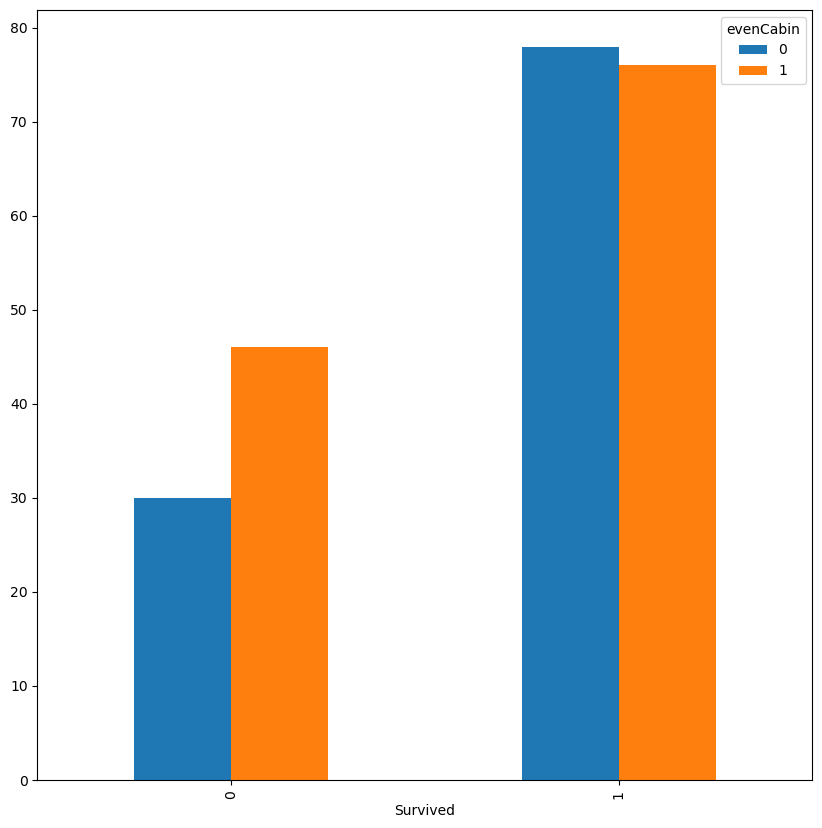

In [49]:
df_nbCabin.groupby(['Survived', 'evenCabin'])['PassengerId'].count().unstack().plot(kind ='bar', figsize = (10, 10))

# 0 is the best, it is better to be on the starboard

In [26]:
import re

df_nbCabin['desk']= None
for i in range(len(df_nbCabin)):
    s = re.findall(r'[A-Z]', df_nbCabin.loc[i, 'Cabin'])
    df_nbCabin.loc[i, 'desk'] = str(s[0])
df_nbCabin

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,generation,fare_category,nbCabin,evenCabin,desk
0,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,"(30.263, 40.21]","(42.694, 85.388]",85,0,C
1,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,"(30.263, 40.21]","(42.694, 85.388]",123,0,C
2,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,"(50.158, 60.105]","(42.694, 85.388]",46,1,E
3,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,"(0.34, 10.368]","(-0.512, 42.694]",6,1,G
4,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,"(50.158, 60.105]","(-0.512, 42.694]",103,0,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,764,1,1,"Carter, Mrs. William Ernest (Lucile Polk)",female,36.0,1,2,113760,120.0000,B98,S,"(30.263, 40.21]","(85.388, 128.082]",98,1,B
226,790,0,1,"Guggenheim, Mr. Benjamin",male,46.0,0,0,PC 17593,79.2000,B84,C,"(40.21, 50.158]","(42.694, 85.388]",84,1,B
227,803,1,1,"Carter, Master. William Thornton II",male,11.0,1,2,113760,120.0000,B98,S,"(10.368, 20.315]","(85.388, 128.082]",98,1,B
228,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B53,S,"(30.263, 40.21]","(-0.512, 42.694]",53,0,B


<AxesSubplot:xlabel='Survived'>

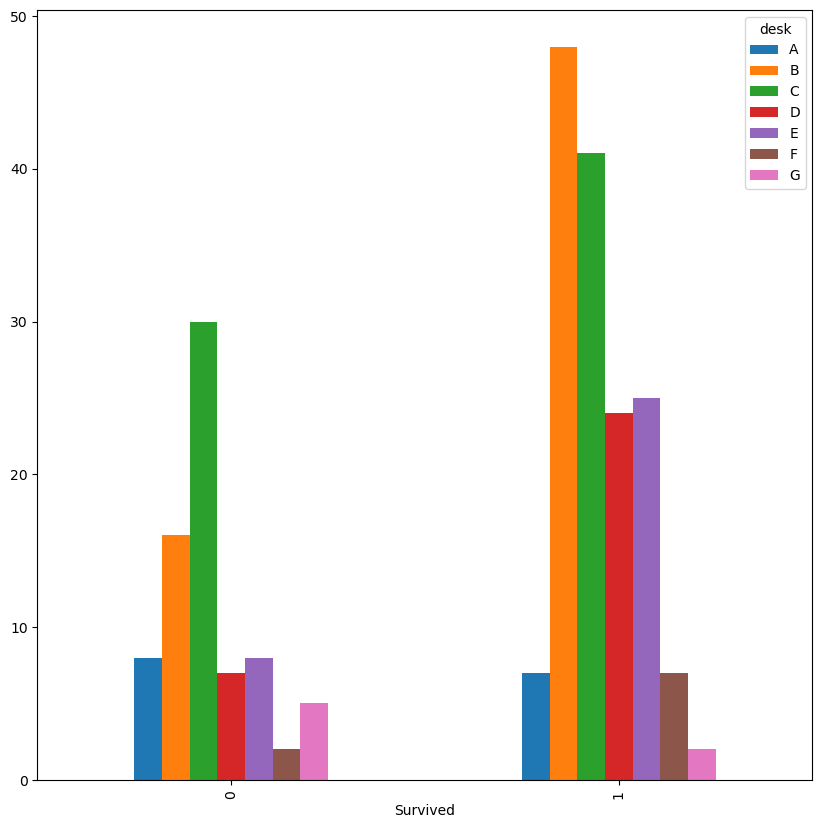

In [52]:
df_nbCabin.groupby(['Survived', 'desk'])['PassengerId'].count().unstack().plot(kind ='bar', figsize = (10, 10))

# it is better to be on B or C

In [27]:
df_nbCabin[['Survived', 'Parch']].corr()

,Survived,Parch
Survived,1.000000,0.023973
Parch,0.023973,1.000000


In [28]:
import scipy.stats

scipy.stats.pearsonr(df_nbCabin['Survived'], df_nbCabin['Parch'])

# do not reject correlation is zero, not significant

PearsonRResult(statistic=0.023973042788094732, pvalue=0.7176208448137262)

In [31]:
df_nbCabin

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,generation,fare_category,nbCabin,evenCabin,desk
0,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,"(30.263, 40.21]","(42.694, 85.388]",85,0,C
1,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,"(30.263, 40.21]","(42.694, 85.388]",123,0,C
2,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,"(50.158, 60.105]","(42.694, 85.388]",46,1,E
3,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,"(0.34, 10.368]","(-0.512, 42.694]",6,1,G
4,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,"(50.158, 60.105]","(-0.512, 42.694]",103,0,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,764,1,1,"Carter, Mrs. William Ernest (Lucile Polk)",female,36.0,1,2,113760,120.0000,B98,S,"(30.263, 40.21]","(85.388, 128.082]",98,1,B
226,790,0,1,"Guggenheim, Mr. Benjamin",male,46.0,0,0,PC 17593,79.2000,B84,C,"(40.21, 50.158]","(42.694, 85.388]",84,1,B
227,803,1,1,"Carter, Master. William Thornton II",male,11.0,1,2,113760,120.0000,B98,S,"(10.368, 20.315]","(85.388, 128.082]",98,1,B
228,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B53,S,"(30.263, 40.21]","(-0.512, 42.694]",53,0,B


#### What is the typical profile of the person who will survive the shipwreck?

#### What is the typical profile of the person who will not survive the shipwreck?

In [48]:
df_nbCabin = df_nbCabin.drop(np.where(df_nbCabin['Age'].isnull())[0])
data.reset_index(drop = True, inplace = True)
survived = df_nbCabin['Survived']
data = df_nbCabin.iloc[:, [0, 2, 4, 5, 6, 7, 9, 14, 15, 16]]
data['Sex'] = np.where(data['Sex'] == 'female', 1, 0)
data['nbCabin'] = pd.to_numeric(data['nbCabin'], errors='coerce')
data

C:\Users\lea31\AppData\Local\Temp\ipykernel_34552\4258366911.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Sex'] = np.where(data['Sex'] == 'female', 1, 0)
C:\Users\lea31\AppData\Local\Temp\ipykernel_34552\4258366911.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['nbCabin'] = pd.to_numeric(data['nbCabin'], errors='coerce')


,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,nbCabin,evenCabin,desk
0,2,1,1,38.0,1,0,71.2833,85,0,C
1,4,1,1,35.0,1,0,53.1000,123,0,C
2,7,1,0,54.0,0,0,51.8625,46,1,E
3,11,3,1,4.0,1,1,16.7000,6,1,G
4,12,1,1,58.0,0,0,26.5500,103,0,C
...,...,...,...,...,...,...,...,...,...,...
225,764,1,1,36.0,1,2,120.0000,98,1,B
226,790,1,0,46.0,0,0,79.2000,84,1,B
227,803,1,0,11.0,1,2,120.0000,98,1,B
228,873,1,0,33.0,0,0,5.0000,53,0,B


In [49]:
data = pd.get_dummies(data)
data

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,nbCabin,evenCabin,desk_A,desk_B,desk_C,desk_D,desk_E,desk_F,desk_G
0,2,1,1,38.0,1,0,71.2833,85,0,0,0,1,0,0,0,0
1,4,1,1,35.0,1,0,53.1000,123,0,0,0,1,0,0,0,0
2,7,1,0,54.0,0,0,51.8625,46,1,0,0,0,0,1,0,0
3,11,3,1,4.0,1,1,16.7000,6,1,0,0,0,0,0,0,1
4,12,1,1,58.0,0,0,26.5500,103,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,764,1,1,36.0,1,2,120.0000,98,1,0,1,0,0,0,0,0
226,790,1,0,46.0,0,0,79.2000,84,1,0,1,0,0,0,0,0
227,803,1,0,11.0,1,2,120.0000,98,1,0,1,0,0,0,0,0
228,873,1,0,33.0,0,0,5.0000,53,0,0,1,0,0,0,0,0


In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

model = LogisticRegression(solver='liblinear', random_state=0)

model.fit(data, survived)

LogisticRegression(random_state=0, solver='liblinear')

In [59]:
print(data.columns)
print(model.coef_)

# the best situation is to be a young female in the first class, with siblings, no parents, with a high nbCabin, 
# with an odd number of cabin and a desk A

Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'nbCabin', 'evenCabin', 'desk_A', 'desk_B', 'desk_C', 'desk_D',
       'desk_E', 'desk_F', 'desk_G'],
      dtype='object')
[[ 1.15279922e-03 -1.55255896e-01  2.46359576e+00 -3.40682130e-02
   2.14302377e-01 -3.28389207e-01  4.07711086e-03  6.93042921e-03
  -1.01474391e-01  6.45072973e-01 -9.60399174e-02 -9.43342768e-01
   5.34325606e-01  5.14203899e-01  7.78170444e-01 -1.16094206e+00]]


In [58]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

print(accuracy_score(survived, model.predict(data)))
print(confusion_matrix(survived, model.predict(data)))

0.7725118483412322
[[ 40  28]
 [ 20 123]]
